In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine



In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite") 

In [7]:
# reflect an existing database into a new model
#
##Declare a Base using `automap_base()`
Base = automap_base()
Base.metadata.create_all(engine)
from sqlalchemy.orm import Session
session = Session(bind=engine)


# reflect the tables
## Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
##Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
## Assign the measurement and station class to a variable 
MEASUREMENT= Base.classes.measurement
STATION= Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
## Create a session
session = Session(engine)

In [11]:
## Display the row's columns and data in dictionary format
first_row = session.query(MEASUREMENT).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x119002e10>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

In [12]:
first_row = session.query(STATION).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x119022210>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1}

# Exploratory Climate Analysis

# Precipitation Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(MEASUREMENT.date).order_by(MEASUREMENT.date.desc()).all()
# Calculate the date 1 year ago from the last data point in the database
last_date= session.query(MEASUREMENT.date).order_by(MEASUREMENT.date.desc()).first()
last_date
oneyear_from_last_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
oneyear_from_last_date
# Perform a query to retrieve the date and precipitation scores
sel = [ MEASUREMENT.date,MEASUREMENT.prcp]
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
date_percipitation = session.query(*sel).\
    filter(MEASUREMENT.date > oneyear_from_last_date).\
    group_by(MEASUREMENT.date).\
    order_by(MEASUREMENT.date).all()

date_percipitation

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [15]:
df = pd.DataFrame(date_percipitation, columns= ['date','prcp'])
df

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
360,2017-08-19,0.00
361,2017-08-20,0.00
362,2017-08-21,0.00
363,2017-08-22,0.00


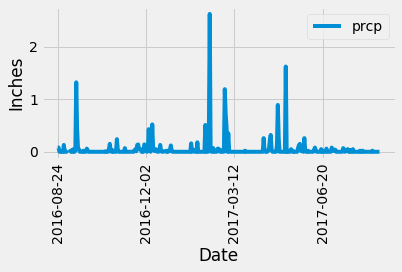

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data

df.set_index('date', inplace=True)

df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

plt.tight_layout()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['prcp'].describe()

count    363.000000
mean       0.048843
std        0.205197
min        0.000000
25%        0.000000
50%        0.000000
75%        0.020000
max        2.620000
Name: prcp, dtype: float64

# Station Analysis



In [18]:
# Design a query to show how many stations are available in this dataset?
session.query(STATION.station).count()

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(MEASUREMENT.station, func.count(MEASUREMENT.station)).group_by(MEASUREMENT.station).order_by(func.count(MEASUREMENT.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(MEASUREMENT.station, func.min(MEASUREMENT.tobs), 
              func.max(MEASUREMENT.tobs), func.avg(MEASUREMENT.tobs)).filter(MEASUREMENT.station=='USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

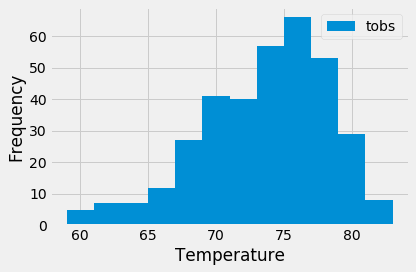

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observation= session.query(MEASUREMENT.tobs).filter(MEASUREMENT.station=='USC00519281').\
filter(MEASUREMENT.date>=oneyear_from_last_date ).all()

temp_df= pd.DataFrame(temp_observation, columns=['tobs'])
temp_df.plot.hist(bins=12)
plt.xlabel("Temperature")

plt.tight_layout()